In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize

In [2]:
medoids_df = pd.read_csv("/home/wollerf/Projects/GRN-FinDeR_Results.git/results/manuscript/breast_testis_kidney/medoid_targets_wasserstein_results.csv")
random_df = pd.read_csv("/home/wollerf/Projects/GRN-FinDeR_Results.git/results/manuscript/breast_testis_kidney/random_targets_wasserstein_results.csv")


In [3]:
medoids_df['mode'] = 'Medoid'
random_df['mode'] = 'Random'
combined_df = pd.concat([medoids_df, random_df], ignore_index=True, sort=False)
# Only plot until num_non_tfs <= 100.
combined_df = combined_df[combined_df['num_non_tfs'] <= 100]
combined_df['abs_time_saving'] /= 3600.0

In [4]:
def format_ticks(y, _):
        # Format with 2 decimals
        s = f'{y:.2f}'
        # Remove trailing zeros and dot if needed
        if '.' in s:
            s = s.rstrip('0').rstrip('.')
        # Remove leading zero before decimal point
        if s.startswith('0.') or s.startswith('-0.'):
            s = s.replace('0.', '.')
        return s

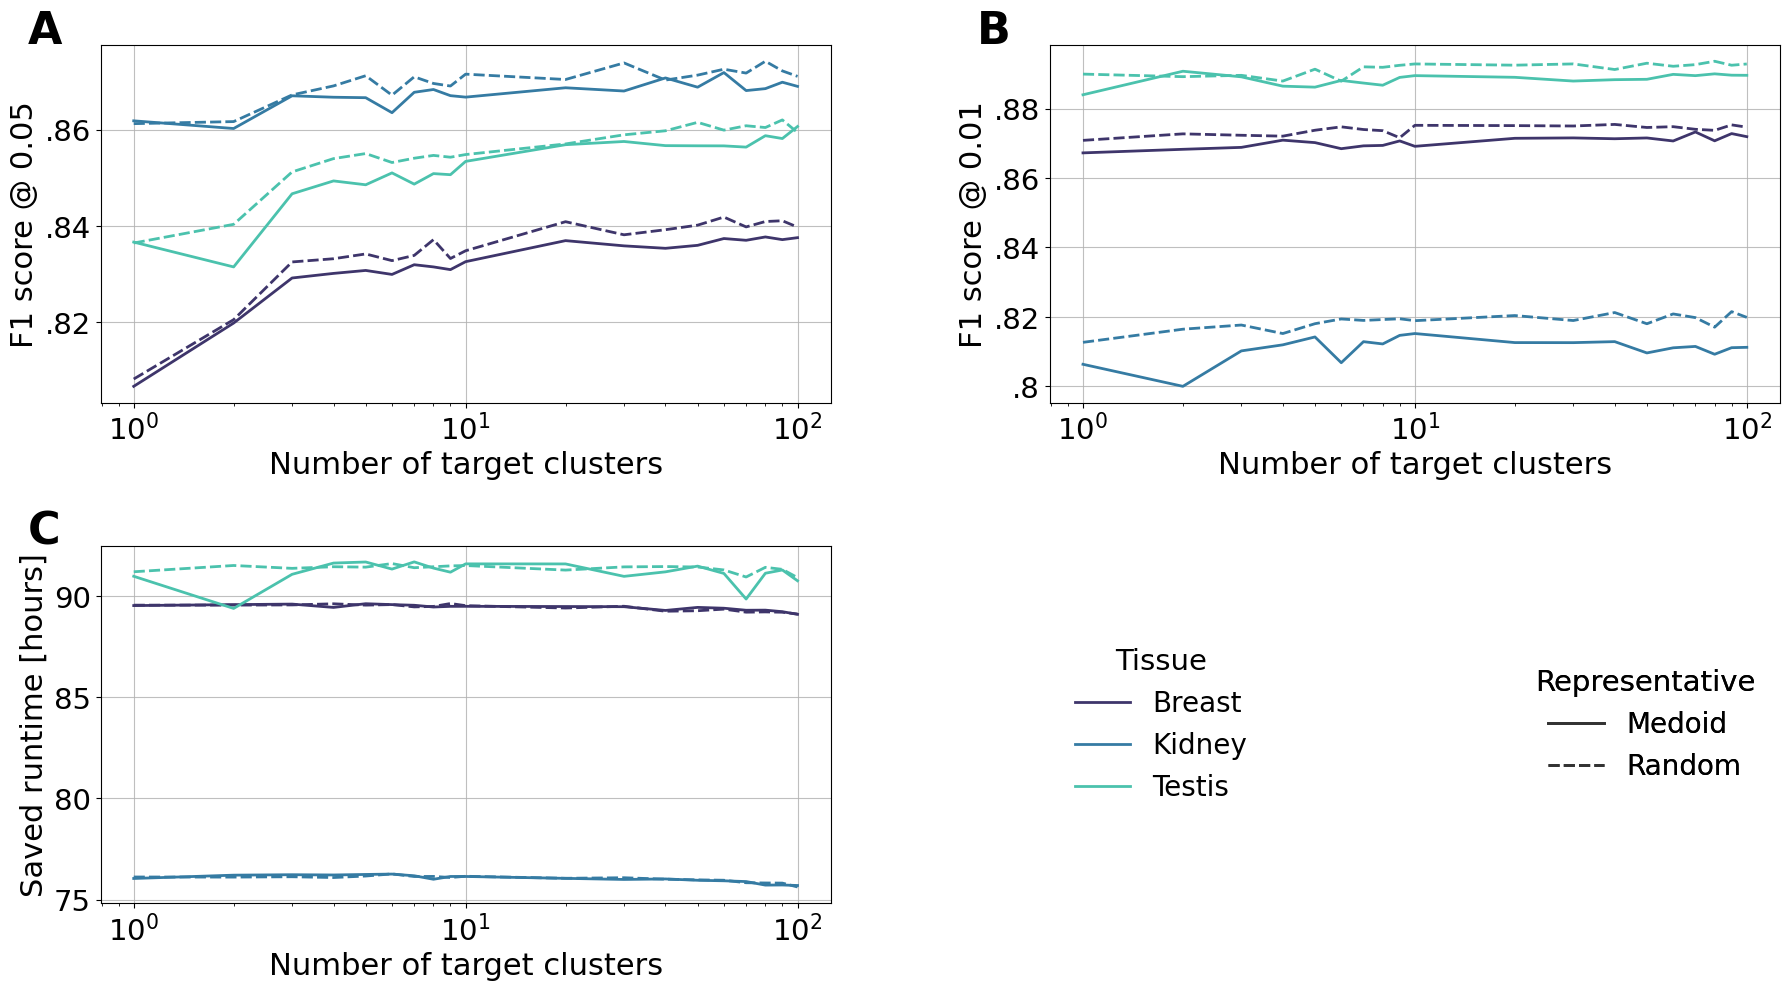

In [6]:
# Create custom mosaic: A | legend | B
fig, axs = plt.subplot_mosaic([['A', 'B'], ['C', 'legend']])
fig.set_size_inches(18, 10)  # Adjust as needed

label_fontsize = 22
formatter = FuncFormatter(format_ticks)

# --- Plot A: f1_005 ---
sns.lineplot(
    data=combined_df,
    x='num_non_tfs',
    y='f1_005',
    hue='tissue',
    style='mode',
    ax=axs['A'],
    palette="mako",
    linewidth=2.0
)
axs['A'].set_xlabel('Number of target clusters', fontsize=label_fontsize)
axs['A'].set_ylabel('F1 score @ 0.05', fontsize=label_fontsize)
axs['A'].tick_params(axis='x', labelsize=label_fontsize - 1)
axs['A'].tick_params(axis='y', labelsize=label_fontsize - 1)
axs['A'].yaxis.set_major_formatter(formatter)
axs['A'].set_xscale('log')
axs['A'].grid(True, alpha=0.8)

# --- Plot B: f1_001 ---
sns.lineplot(
    data=combined_df,
    x='num_non_tfs',
    y='f1_001',
    hue='tissue',
    style='mode',
    ax=axs['B'],
    palette="mako",
    linewidth=2.0
)
axs['B'].set_xlabel('Number of target clusters', fontsize=label_fontsize)
axs['B'].set_ylabel('F1 score @ 0.01', fontsize=label_fontsize)
axs['B'].tick_params(axis='x', labelsize=label_fontsize - 1)
axs['B'].tick_params(axis='y', labelsize=label_fontsize - 1)
axs['B'].yaxis.set_major_formatter(formatter)
axs['B'].set_xscale('log')
axs['B'].grid(True, alpha=0.8)

sns.lineplot(
    data=combined_df,
    x='num_non_tfs',
    y='abs_time_saving',
    hue='tissue',
    style='mode',
    ax=axs['C'],
    palette="mako",
    linewidth=2.0
)
axs['C'].set_xlabel('Number of target clusters', fontsize=label_fontsize)
axs['C'].set_ylabel('Saved runtime [hours]', fontsize=label_fontsize)
axs['C'].tick_params(axis='x', labelsize=label_fontsize - 1)
axs['C'].tick_params(axis='y', labelsize=label_fontsize - 1)
axs['C'].yaxis.set_major_formatter(formatter)
axs['C'].set_xscale('log')
axs['C'].grid(True, alpha=0.8)

# --- Shared Legend (center subplot) ---

# Extract handles and labels from one plot (they're the same)
handles, labels = axs['A'].get_legend_handles_labels()

# Determine how many are hue vs. style
unique_tissues = combined_df['tissue'].unique()
unique_modes = combined_df['mode'].unique()

# Split into two groups
tissue_handles = handles[1:len(unique_tissues)+1]
tissue_labels = labels[1:len(unique_tissues)+1]

mode_handles = handles[len(unique_tissues)+2:]
mode_labels = labels[len(unique_tissues)+2:]

# Remove legends from individual plots
axs['A'].legend_.remove()
axs['B'].legend_.remove()
axs['C'].legend_.remove()
axs['legend'].axis('off')  # Hide legend subplot axes

# Add tissue legend (upper center)
legend1 = axs['legend'].legend(
    handles=tissue_handles,
    labels=tissue_labels,
    title='Tissue',
    loc='center left',
    fontsize=label_fontsize - 2,
    title_fontsize=label_fontsize - 1,
    frameon=False
)

# Add mode legend (lower center)
legend2 = axs['legend'].legend(
    handles=mode_handles,
    labels=mode_labels,
    title='Representative',
    loc='center right',
    fontsize=label_fontsize - 2,
    title_fontsize=label_fontsize - 1,
    frameon=False
)

# Add both legends to the same axis
axs['legend'].add_artist(legend1)
axs['legend'].add_artist(legend2)

labels = {'A': 'A', 'B': 'B', 'C' : 'C'}

for key, label in labels.items():
    ax = axs[key]
    ax.text(
        -0.1, 1.1, label,  # x, y (in axes fraction coords)
        transform=ax.transAxes,
        fontsize=32,
        fontweight='bold',
        va='top',
        ha='left'
    )
    
fig.tight_layout()
fig.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.show()
plt.savefig("supplement_medoid_vs_random.pdf", format='pdf')